# Assignment 5, Question 5: Missing Data Analysis

**Points: 15**

Apply and compare different missing data strategies on the clinical trial dataset.

## Setup

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import utilities from Q3
from q3_data_utils import load_data, detect_missing, fill_missing

# Load the data
df = load_data('output/df_q4_cleaned.csv')
print(df)
print(f"Loaded {len(df)} patients with {len(df.columns)} variables")

# Prewritten visualization function for missing data
def visualize_missing_data(missing_counts):
    """
    Create a bar chart of missing values by column.
    
    Args:
        missing_counts: pandas Series with missing value counts per column
    """
    plt.figure(figsize=(10, 6))
    missing_counts.plot(kind='bar')
    plt.title('Missing Values by Column')
    plt.xticks(rotation=45)
    plt.ylabel('Number of Missing Values')
    plt.tight_layout()
    plt.show()

      Unnamed: 0 patient_id  age         sex   bmi enrollment_date  \
0              0     P00001   80           F  29.3      2022-05-01   
1              1     P00002   80    Female     NaN      2022-01-06   
2              2     P00003   82      Female  -1.0      2023-11-04   
3              3     P00004   95      Female  25.4      2022-08-15   
4              4     P00005   95           M   NaN      2023-04-17   
...          ...        ...  ...         ...   ...             ...   
9995        9995     P09996   72        Male  23.2      2022-04-11   
9996        9996     P09997  100      Female  28.9      2023-02-10   
9997        9997     P09998   78           F  23.8      2023-11-05   
9998        9998     P09999   86           F  27.0      2022-08-27   
9999        9999     P10000   67      Female  29.4      25-03-2022   

      systolic_bp  diastolic_bp  cholesterol_total  cholesterol_hdl  \
0           123.0          80.0              120.0             55.0   
1           139.0

## Part 1: Detect Missing Data (3 points)

1. Use the `detect_missing()` utility to find missing values
2. Visualize missing data with a bar plot
3. Calculate the percentage of missing values per column

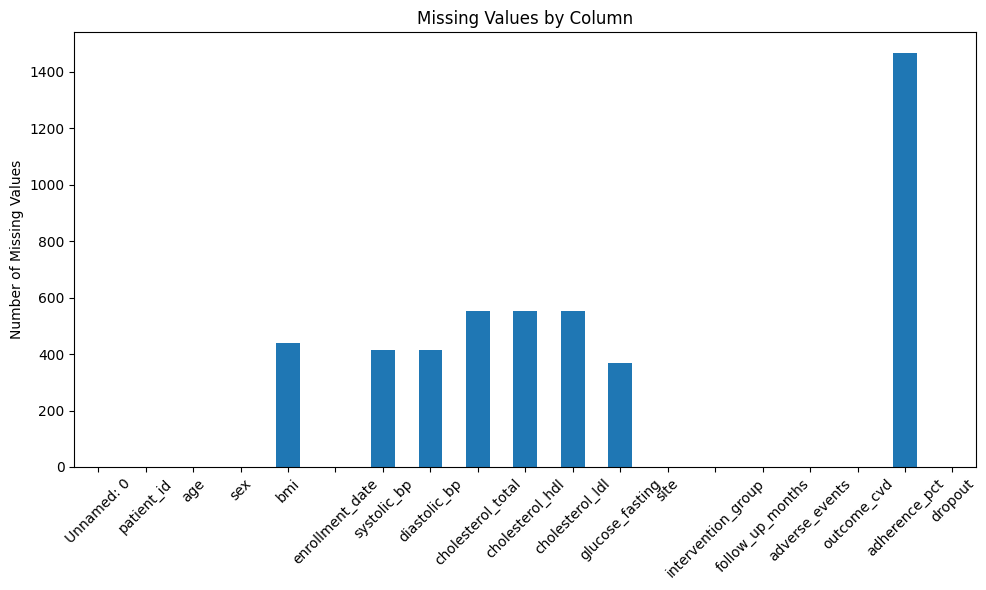

Unnamed: 0             0.00
patient_id             0.00
age                    0.00
sex                    0.00
bmi                    4.38
enrollment_date        0.00
systolic_bp            4.14
diastolic_bp           4.14
cholesterol_total      5.54
cholesterol_hdl        5.54
cholesterol_ldl        5.54
glucose_fasting        3.69
site                   0.00
intervention_group     0.00
follow_up_months       0.00
adverse_events         0.00
outcome_cvd            0.00
adherence_pct         14.67
dropout                0.00
dtype: float64


In [59]:
# TODO: Detect and analyze missing data
# 1. Use detect_missing(df) to get missing value counts
# 2. Calculate percentage of missing values per column  
# 3. Print both counts and percentages
# 4. Identify which columns have missing data

# Optional: Use the visualization function above to create a bar chart
# visualize_missing_data(missing_counts)
missing = detect_missing(df)
visualize_missing_data(missing)
print((missing / len(df)) * 100)

## Part 2: Compare Imputation Strategies (6 points)

For the 'cholesterol_total' column (which has missing values):

1. Fill with mean using `fill_missing()` utility
2. Fill with median using `fill_missing()` utility  
3. Forward fill using pandas `.fillna(method='ffill')`
4. Compare the three strategies - create a summary table showing:
   - Original mean/median
   - Mean/median after each strategy
   - How many values were filled

In [60]:
# TODO: Compare imputation strategies)
mean_strategy = fill_missing(df, "cholesterol_total", "mean")
median_strategy = fill_missing(df, "cholesterol_total", "median")
ffill_strategy = fill_missing(df, "cholesterol_total", "ffill")

summary = pd.DataFrame({'Strategy': ["Original", "Mean Fill", "Median Fill", "Forward Fill"], 'Mean': [df['cholesterol_total'].mean(), mean_strategy['cholesterol_total'].mean(), median_strategy['cholesterol_total'].mean(), ffill_strategy['cholesterol_total'].mean()], 'Median': [df['cholesterol_total'].median(), mean_strategy['cholesterol_total'].median(), median_strategy['cholesterol_total'].median(), ffill_strategy['cholesterol_total'].median()], 'Values Filled': [0, missing['cholesterol_total'], missing['cholesterol_total'], missing['cholesterol_total']]})
print(summary)

       Strategy        Mean      Median  Values Filled
0      Original  178.039488  177.000000              0
1     Mean Fill  178.039488  178.039488            554
2   Median Fill  177.981900  177.000000            554
3  Forward Fill  178.070500  177.000000            554


## Part 3: Dropping Missing Data (3 points)

1. Drop rows where ANY column has missing data - how many rows remain?
2. Drop rows where specific columns have missing data (e.g., only 'age' or 'bmi')
3. Which approach loses less data?

In [61]:
# TODO: Drop missing rows with different strategies
# Part 1
df_row = df.dropna()
print(f"{len(df_row)} rows remain")
# Part 2
df_column = df.dropna(axis=1)
print(f"{len(df_column.columns)} columns remain")
# Part 3
print(f"Shape of df after dropping rows that have missing data: {df_row.shape}\n Shape of df after dropping columns that have missing data: {df_column.shape}")
print(f"Number of data points for row method: {df_row.shape[0] * df_row.shape[1]}")
print(f"Number of data points for column method: {df_column.shape[0] * df_column.shape[1]}")
print("We can see that the approach of dropping rows where specific columns have missing loses less data points overall.")


7133 rows remain
11 columns remain
Shape of df after dropping rows that have missing data: (7133, 19)
 Shape of df after dropping columns that have missing data: (10000, 11)
Number of data points for row method: 135527
Number of data points for column method: 110000
We can see that the approach of dropping rows where specific columns have missing loses less data points overall.


## Part 4: Create Clean Dataset (3 points)

Apply your chosen strategy to create a clean dataset:
1. Choose appropriate imputation for numeric columns
2. Drop rows with missing critical values (e.g., patient_id, age)
3. Save to `output/q5_cleaned_data.csv`
4. Save a missing data report to `output/q5_missing_report.txt`

In [62]:
# TODO: Create and save clean dataset
df_clean = df.copy()
print(df_clean)
numerical_cols = df.select_dtypes(include='number').columns
for col in numerical_cols:
    df_clean[col] = fill_missing(df_clean, col, "median")[col]
df_clean.dropna(subset=['patient_id', 'age', 'sex', 'enrollment_date', 'site', 'intervention_group'], inplace=True)
df_clean.to_csv("output/q5_cleaned_data.csv", index = False)
with open("output/q5_missing_report.txt", "w") as f:
    f.write("Missing Data Report After Cleaning Steps Applied:\n")
    f.write("\n\nColumns with Remaining Missing Data:\n")
    f.write(detect_missing(df_clean).to_string())

      Unnamed: 0 patient_id  age         sex   bmi enrollment_date  \
0              0     P00001   80           F  29.3      2022-05-01   
1              1     P00002   80    Female     NaN      2022-01-06   
2              2     P00003   82      Female  -1.0      2023-11-04   
3              3     P00004   95      Female  25.4      2022-08-15   
4              4     P00005   95           M   NaN      2023-04-17   
...          ...        ...  ...         ...   ...             ...   
9995        9995     P09996   72        Male  23.2      2022-04-11   
9996        9996     P09997  100      Female  28.9      2023-02-10   
9997        9997     P09998   78           F  23.8      2023-11-05   
9998        9998     P09999   86           F  27.0      2022-08-27   
9999        9999     P10000   67      Female  29.4      25-03-2022   

      systolic_bp  diastolic_bp  cholesterol_total  cholesterol_hdl  \
0           123.0          80.0              120.0             55.0   
1           139.0

## Reflection

Which imputation strategy would you recommend for this dataset and why?

**Your answer:**

I would recommend the imputation strategy of filling in NA values with median for this dataset. It's possible that some of the values for our variables take on extreme values. The mean is fairly sensitive to outlier values, whereas the median is more robust to outlier values. Given that we are working with a clinical trial dataset and want to be more representative of the "typical" patient when imputing missing values in the dataset, the median works better because it is less impacted by extreme values that are not very representative of the values that most of the data points takes on. Furthermore, some of the variables in our clinical dataset, such as BMI, may have a skew. The mean has a tendency to be impacted more by the skew of a distribution, whereas the median is affected less by the skew of a distribution. The median would work better when filling in NA values because it would ensure we are using values that are more reflective of the typical patient when filling in NA values, irregardless of the distribution's skew.